
<a href="https://colab.research.google.com/github/takzen/ai-engineering-handbook/blob/main/08_Overfitting_Underfitting.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 📉 Overfitting vs Underfitting (Problem Złotowłosej)

W Machine Learningu nie chodzi o to, żeby model idealnie znał dane, które już widział.
Chodzi o to, żeby radził sobie z danymi, których **jeszcze nie widział**.

Mamy trzy stany:
1.  **Underfitting (Niedouczenie):** Model jest "za głupi". Nie widzi żadnych zależności. (Np. próbuje opisać łuk prostą linią).
2.  **Overfitting (Przeuczenie):** Model jest "kujonem". Nauczył się danych treningowych na pamięć, łącznie z szumem i błędami. Na nowych danych wyłoży się koncertowo.
3.  **Good Fit (Dobry model):** Złoty środek. Ignoruje szum, łapie ogólny trend.

Zobaczymy to na wykresach.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 1. GENERUJEMY DANE (Symulacja rzeczywistości)
# Wyobraź sobie, że to ceny mieszkań w zależności od wielkości.
# Prawdziwa zależność to lekki łuk (funkcja cosinus), ale dodamy trochę chaosu (szumu).

np.random.seed(0)
n_samples = 30

# Oś X (Wielkość mieszkania)
X = np.sort(np.random.rand(n_samples))

# Prawdziwa funkcja (To jest "Prawda objawiona", której model szuka)
true_fun = lambda X: np.cos(1.5 * np.pi * X)

# Oś Y (Cena) + Szum (losowe wahania rynku)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

print("Dane wygenerowane. Mamy punkty, które układają się w łuk, ale są trochę 'rozchwiane'.")

Dane wygenerowane. Mamy punkty, które układają się w łuk, ale są trochę 'rozchwiane'.


## Wizualizacja 3 Światów

Stworzymy teraz trzy modele, żeby spróbowały przewidzieć ten kształt:

1.  **Model Liniowy (Stopień 1):** Prosta kreska. (Underfitting).
2.  **Model Wielomianowy (Stopień 4):** Ładny łuk. (Idealny).
3.  **Model Szalony (Stopień 15):** Bardzo powyginana krzywa, która próbuje przejść przez KAŻDY punkt. (Overfitting).

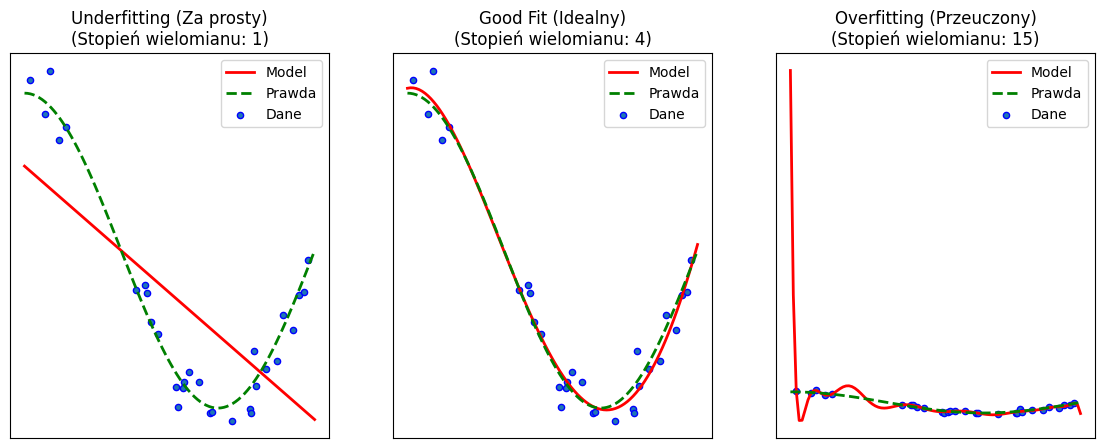

In [2]:
# Ustawiamy wykres
plt.figure(figsize=(14, 5))

# Definiujemy stopnie skomplikowania modeli
degrees = [1, 4, 15]
titles = ['Underfitting (Za prosty)', 'Good Fit (Idealny)', 'Overfitting (Przeuczony)']

for i in range(len(degrees)):
    ax = plt.subplot(1, 3, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    degree = degrees[i]
    
    # Tworzymy model wielomianowy (Polynomial Regression)
    # To po prostu sposób na narysowanie krzywej linii zamiast prostej
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    
    # Łączymy to w rurę (Pipeline): Najpierw zrób krzywą, potem dopasuj linię
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    
    # Trenujemy model na naszych punktach
    pipeline.fit(X[:, np.newaxis], y)

    # Sprawdzamy, jak model widzi świat (rysujemy linię modelu)
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model", linewidth=2, color='red')
    
    # Rysujemy prawdziwą funkcję (ideał)
    plt.plot(X_test, true_fun(X_test), label="Prawda", linewidth=2, linestyle='--', color='green')
    
    # Rysujemy nasze punkty treningowe (dane)
    plt.scatter(X, y, edgecolor='b', s=20, label="Dane")
    
    plt.title(f"{titles[i]}\n(Stopień wielomianu: {degree})")
    plt.legend(loc="best")

plt.show()

## Co widzisz na wykresach?

1.  **Wykres 1 (Underfitting):** Czerwona linia jest prosta. Kompletnie ignoruje kształt danych (łuk). Błąd jest duży.
2.  **Wykres 2 (Good Fit):** Czerwona linia ładnie pokrywa się z zieloną linią przerywaną (Prawdą). Ignoruje pojedyncze kropki, które odstają, ale łapie sens.
3.  **Wykres 3 (Overfitting):** Czerwona linia szaleje! Wywija się w górę i w dół, byle tylko zaliczyć każdą niebieską kropkę.
    *   To wygląda imponująco ("Patrz szefie, przechodzi przez wszystkie punkty!").
    *   Ale spójrz na końcówkę wykresu – linia wystrzeliwuje w kosmos. Gdyby przyszedł nowy klient (nowy punkt), model pomyliłby się gigantycznie.

## 🧠 Podsumowanie: Kujon vs Geniusz

Dlaczego Overfitting jest gorszy niż Underfitting?

**Tu jest haczyk.**
Overfitting daje złudne poczucie bezpieczeństwa. Podczas testów w domu (na danych treningowych) masz 100% skuteczności. Myślisz, że zbudowałeś najlepsze AI na świecie.
Wypuszczasz je na rynek i następuje katastrofa.

To tak, jakbyś uczył się na egzamin z historii, zapamiętując kolejność pytań na kartce ("1. A, 2. C, 3. B"), zamiast dat i wydarzeń.
*   Jeśli nauczyciel da tę samą kartkę -> Dostaniesz 6 (Overfitting).
*   Jeśli nauczyciel zmieni kolejność pytań -> Dostaniesz 1.

**Wniosek:**
Lepiej mieć model, który popełnia małe błędy, ale "rozumie" ogólną zasadę, niż taki, który jest perfekcyjny na starych danych, a bezradny wobec nowych. W AI Engineerigu nazywamy to **Generalizacją**.